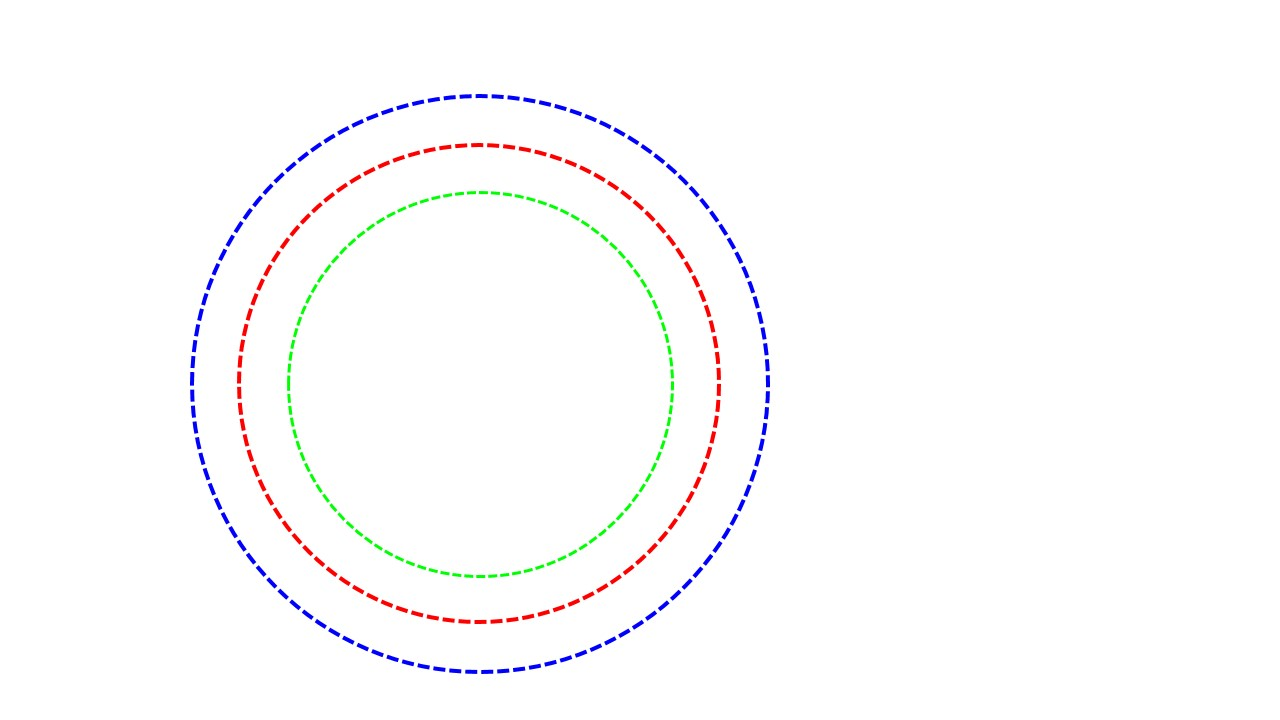

In [0]:
import cv2

from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Hist5.jpg')

#cv2_imshow(img)

res_img = img 

cv2_imshow(res_img)

In [0]:
# Designing Laplacian Kernel.

import numpy as np

# r_channel = np.array([[[0,1,0],[1,-4,1],[0,1,0]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]],np.int32)

b_channel = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[-1,0,1],[-2,0,2],[-1,0,1]],[[-1,0,1],[-2,0,2],[-1,0,1]]],np.int32)

# g_channel = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[0,1,0],[1,-4,1],[0,1,0]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]],np.int32)
g_channel = np.array([[[-1,0,1],[-2,0,2],[-1,0,1]],[[1,1,1],[1,1,1],[1,1,1]],[[-1,0,1],[-2,0,2],[-1,0,1]]],np.int32)

# r_channel = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[0,1,0],[1,-4,1],[0,1,0]]],np.int32)
r_channel = np.array([[[-1,0,1],[-2,0,2],[-1,0,1]],[[-1,0,1],[-2,0,2],[-1,0,1]],[[1,1,1],[1,1,1],[1,1,1]]],np.int32)

r_channel

array([[[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]],

       [[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=int32)

In [0]:
import copy

temp_new_green  = copy.deepcopy(res_img)

r,c,v = temp_new_green.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
    
    tempInt_0 = sum(sum(np.multiply(temparray_0,g_channel[0])))
    tempInt_1 = (1/9)*sum(sum(np.multiply(temparray_1,g_channel[1])))
    tempInt_2 = sum(sum(np.multiply(temparray_2,g_channel[2])))
    
    if tempInt_0>=255 and tempInt_2>=255:
    
      tempInt_0 = 0
      tempInt_1 = 255
      tempInt_2 = 0
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
      
    
    temp_new_green[i,j,0] = tempInt_0
    temp_new_green[i,j,1] = tempInt_1
    temp_new_green[i,j,2] = tempInt_2
    
# cv2_imshow(temp_new_green)
print('Detected Green Circle !!!')

Detected Green Circle !!!


In [0]:
import copy

temp_new_red  = copy.deepcopy(res_img)

r,c,v = temp_new_red.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
    
    tempInt_0 = sum(sum(np.multiply(temparray_0,r_channel[0])))
    tempInt_1 = sum(sum(np.multiply(temparray_1,r_channel[1])))
    tempInt_2 = (1/9)*sum(sum(np.multiply(temparray_2,r_channel[2])))
    
    if tempInt_0>=255 and tempInt_1>=255:
    
      tempInt_1 = 0
      tempInt_0 = 0
      tempInt_2 = 255
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
      
    
    temp_new_red[i,j,0] = tempInt_0
    temp_new_red[i,j,1] = tempInt_1
    temp_new_red[i,j,2] = tempInt_2
    
    
# cv2_imshow(temp_new_red)
print('Detected Red Circle !!!')

Detected Red Circle !!!


In [0]:
import copy

temp_new_blue  = copy.deepcopy(res_img)

r,c,v = temp_new_blue.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
    
    tempInt_0 = (1/9)*sum(sum(np.multiply(temparray_0,b_channel[0])))
    tempInt_1 = sum(sum(np.multiply(temparray_1,b_channel[1])))
    tempInt_2 = sum(sum(np.multiply(temparray_2,b_channel[2])))
    
    if tempInt_1>=255 and tempInt_2>=255:
    
      tempInt_1 = 0
      tempInt_2 = 0
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
      
    
    temp_new_blue[i,j,0] = tempInt_0
    temp_new_blue[i,j,1] = tempInt_1
    temp_new_blue[i,j,2] = tempInt_2
    
# cv2_imshow(temp_new_blue)
print('Detected Blue Circle !!!')

Detected Blue Circle !!!


# ***Result 1 | Detected GREEN Circle***

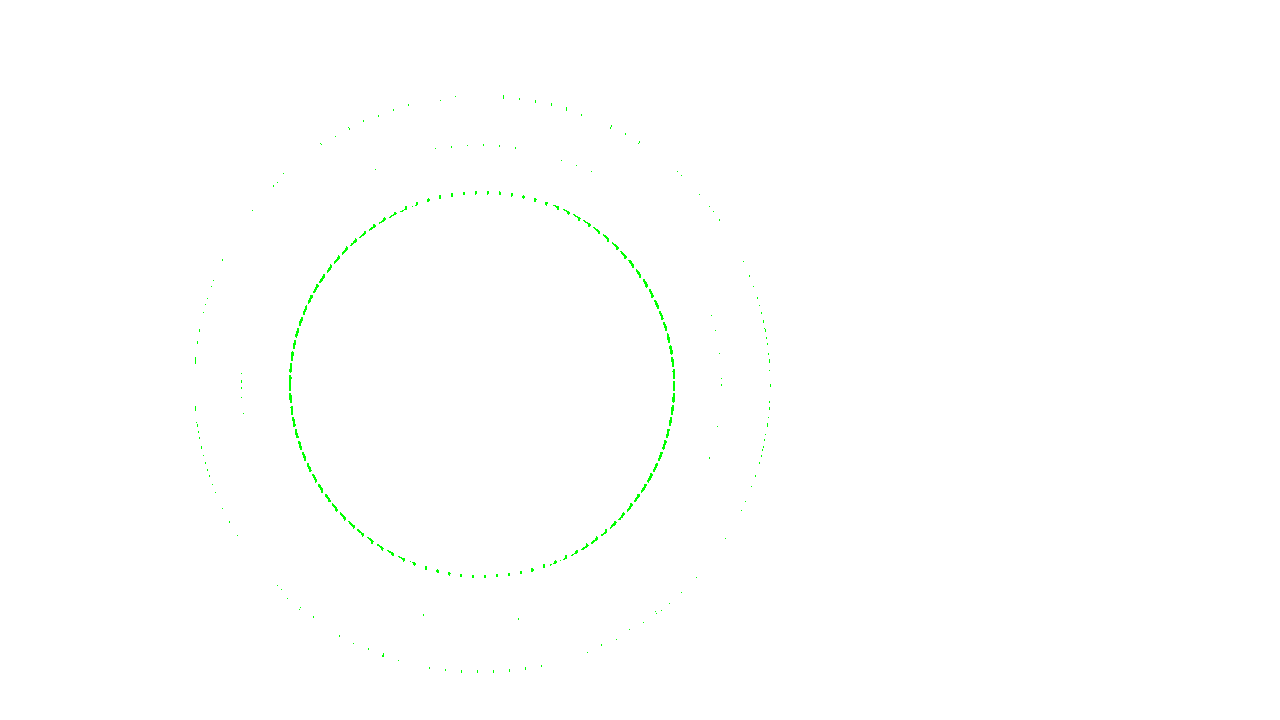

In [0]:
cv2_imshow(temp_new_green)

# ***Result 2 | Detected RED Circle***

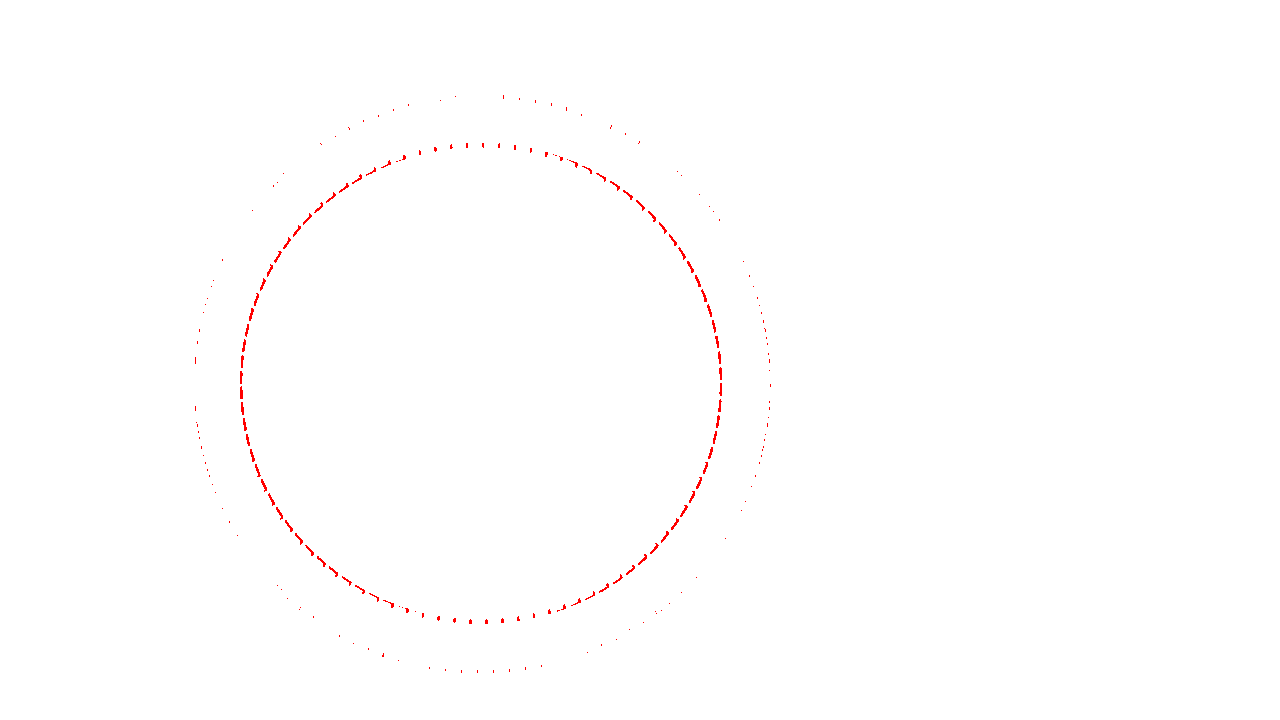

In [0]:
cv2_imshow(temp_new_red)

# ***Result 3 | Detected BLUE Circle***

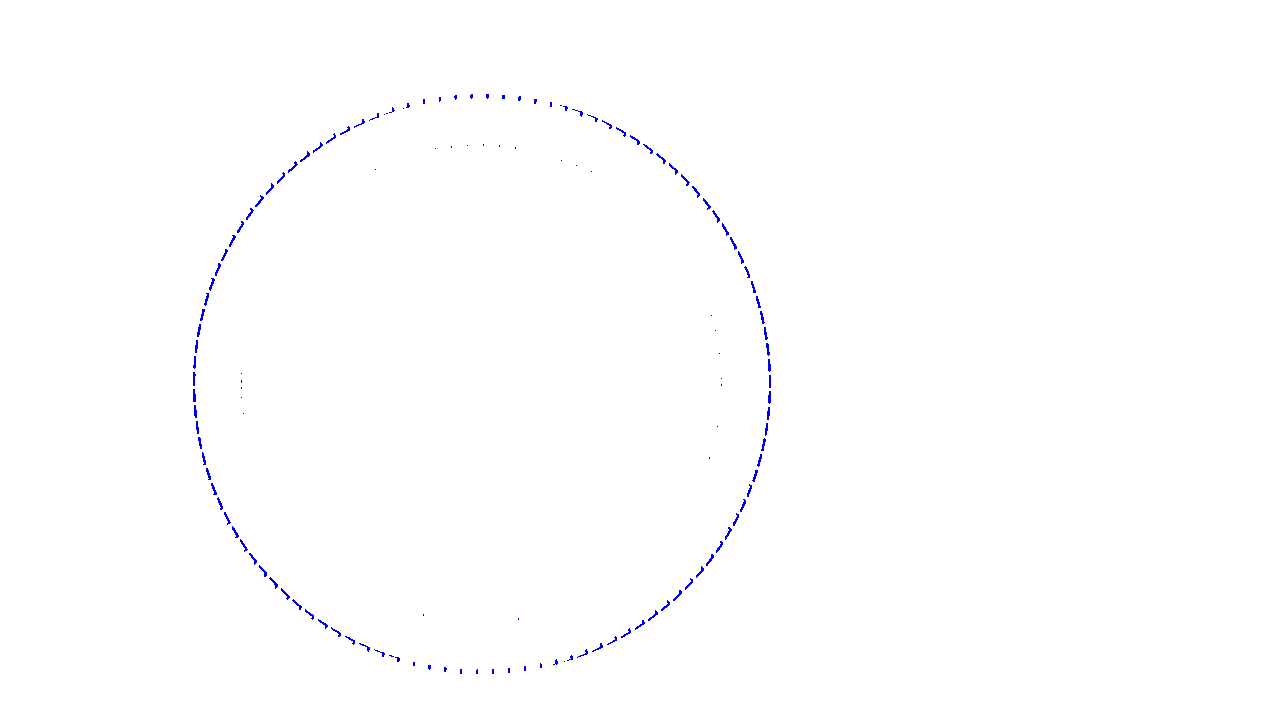

In [0]:
cv2_imshow(temp_new_blue)

# ***Fiting the Circles Using HoughCircles***

RED CIRCLE


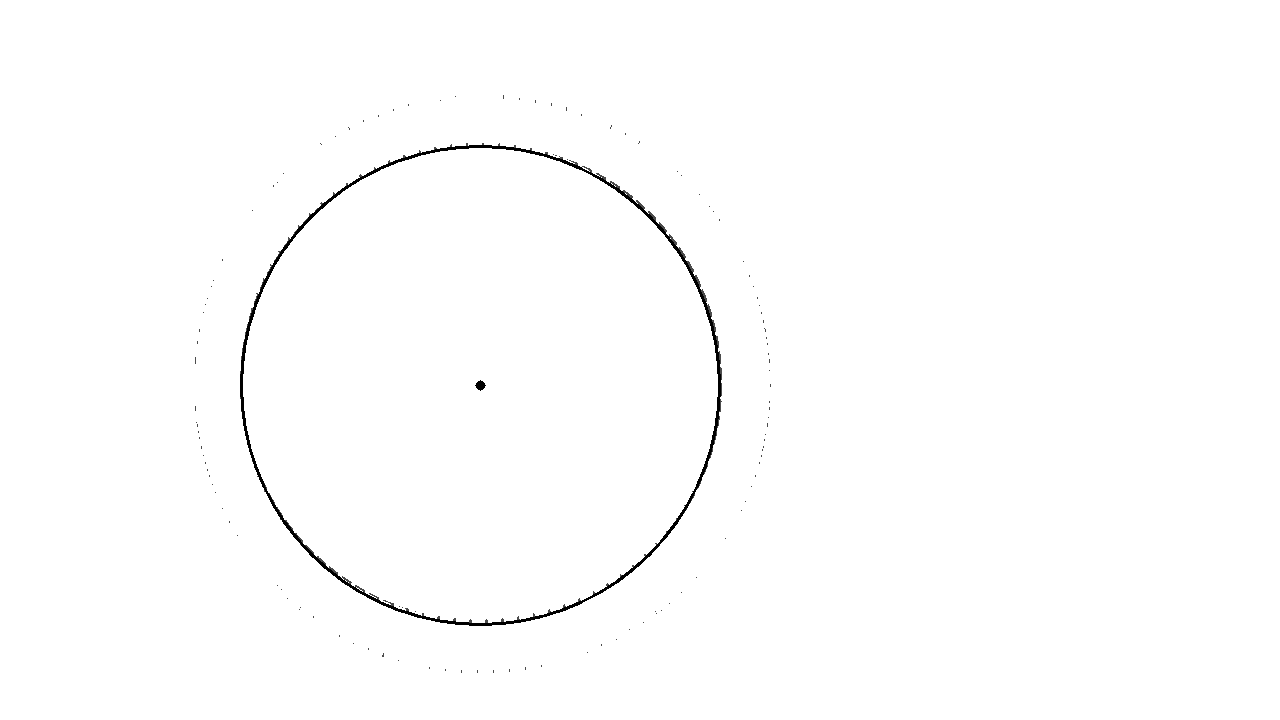

In [0]:
#Fiting the Circles Using HoughCircles

import cv2
import numpy as np

# img = cv2.imread('/content/Hist5.jpg',0)
# img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(temp_new_red,cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1.005,500,param1=200,param2=15,minRadius=10,maxRadius=0)

#cv2_imshow(cimg)
# print(circles)

print('RED CIRCLE')

circles = np.uint16(np.around(circles))
                           
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),5)

cv2_imshow(cimg)


GREEN CIRCLE


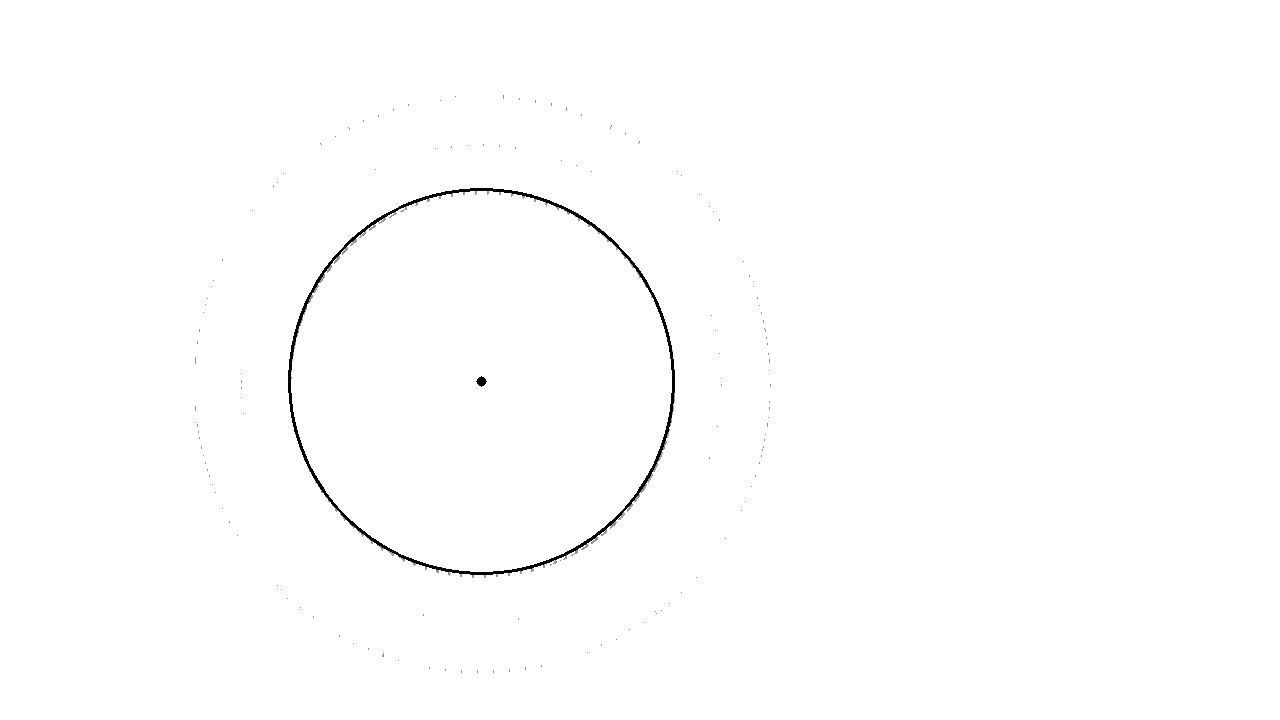

In [0]:
#Fiting the Circles Using HoughCircles

import cv2
import numpy as np

# img = cv2.imread('/content/Hist5.jpg',0)
# img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(temp_new_green,cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1.005,500,param1=200,param2=15,minRadius=10,maxRadius=0)

# cv2_imshow(cimg)
# print(circles)

print('GREEN CIRCLE')

circles = np.uint16(np.around(circles))
                           
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),5)

cv2_imshow(cimg)


BLUE CIRCLE


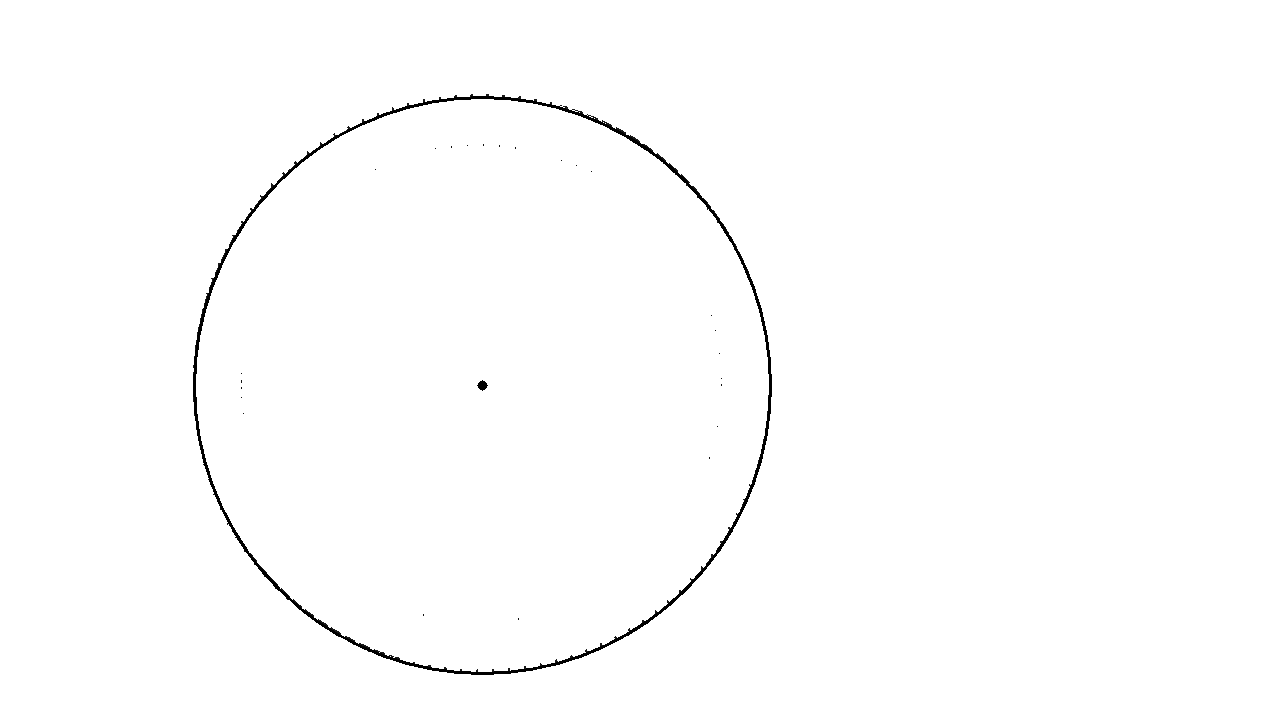

In [0]:
#Fiting the Circles Using HoughCircles

import cv2
import numpy as np

# img = cv2.imread('/content/Hist5.jpg',0)
# img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(temp_new_blue,cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1.005,600,param1=200,param2=15,minRadius=10,maxRadius=500)

# cv2_imshow(cimg)
# print(circles)

print('BLUE CIRCLE')

circles = np.uint16(np.around(circles))
                           
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),5)

cv2_imshow(cimg)
